# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df= pd.merge(mouse_metadata, study_results, on="Mouse ID", how='outer')

# Display the data table for preview
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Checking the number of mice.
unique_mice_count=merged_df['Mouse ID'].nunique()
unique_mice_count

249

In [29]:
# Our data should be uniquely identified by Mouse ID and Timepoint
unique_mice_count=study_results.groupby("Mouse ID")["Timepoint"].nunique()
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=unique_mice_count[unique_mice_count>1].index.tolist()
duplicate_mice

['a203',
 'a251',
 'a262',
 'a275',
 'a366',
 'a401',
 'a411',
 'a444',
 'a457',
 'a492',
 'a520',
 'a577',
 'a644',
 'a685',
 'a699',
 'a788',
 'a818',
 'a897',
 'a963',
 'b128',
 'b313',
 'b487',
 'b559',
 'b742',
 'b759',
 'b879',
 'c139',
 'c264',
 'c282',
 'c302',
 'c326',
 'c402',
 'c458',
 'c559',
 'c580',
 'c757',
 'c758',
 'c766',
 'c819',
 'c832',
 'c895',
 'c927',
 'd164',
 'd251',
 'd474',
 'e213',
 'e227',
 'e291',
 'e476',
 'e584',
 'e662',
 'f129',
 'f234',
 'f278',
 'f345',
 'f394',
 'f436',
 'f545',
 'f966',
 'f993',
 'g107',
 'g288',
 'g296',
 'g316',
 'g497',
 'g558',
 'g570',
 'g791',
 'g867',
 'g989',
 'h246',
 'h333',
 'h531',
 'i177',
 'i334',
 'i386',
 'i477',
 'i557',
 'i635',
 'i669',
 'i738',
 'i901',
 'j119',
 'j235',
 'j246',
 'j296',
 'j365',
 'j755',
 'j913',
 'j984',
 'j989',
 'k210',
 'k382',
 'k403',
 'k483',
 'k510',
 'k603',
 'k754',
 'k804',
 'k862',
 'k894',
 'l215',
 'l264',
 'l471',
 'l490',
 'l509',
 'l558',
 'l661',
 'l700',
 'l725',
 'l733',
 

In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice=merged_df[merged_df.duplicated(subset=['Mouse ID', 'Timepoint'],keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df= merged_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first', inplace=False)
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [34]:
# Checking the number of mice in the clean DataFrame.
unique_mice_count=clean_mouse_df['Mouse ID'].nunique()
unique_mice_count

249

In [41]:
print(clean_mouse_df.columns)

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')


## Summary Statistics

In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group=clean_mouse_df.groupby('Drug Regimen')
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean=regimen_group['Tumor Volume (mm3)'].mean()
tumor_volume_median= regimen_group['Tumor Volume (mm3)'].median()
tumor_volume_var= regimen_group['Tumor Volume (mm3)'].var()
tumor_volume_std=regimen_group['Tumor Volume (mm3)'].std()
tumor_volume_sem=regimen_group['Tumor Volume (mm3)'].sem()
# Asrsemble the resulting series into a single summary DataFrame.
summary_stats_df=pd.DataFrame({'Mean Tumor Volume':tumor_volume_mean,
                             'Median Tumor Volume':tumor_volume_median,
                             'Tumor Volume Variance':tumor_volume_var,
                             'Tumor Volume Std. Dev.':tumor_volume_std,
                              'Tumor Volume Sem':tumor_volume_sem})
print(summary_stats_df)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.393463            50.909965              43.138803   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev.  Tumor Volume 

In [45]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_df=clean_mouse_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median','var','std','sem']})
summary_stats_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

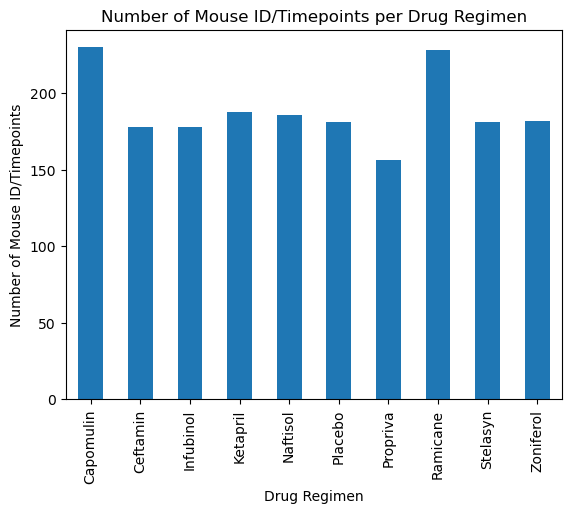

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_count = clean_mouse_df.groupby('Drug Regimen')['Mouse ID'].count()

# Generate a bar plot using Pandas
regimen_count.plot(kind='bar', title='Number of Mouse ID/Timepoints per Drug Regimen')

# Set the xlabel and ylabel
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')

# Show the plot
plt.show()

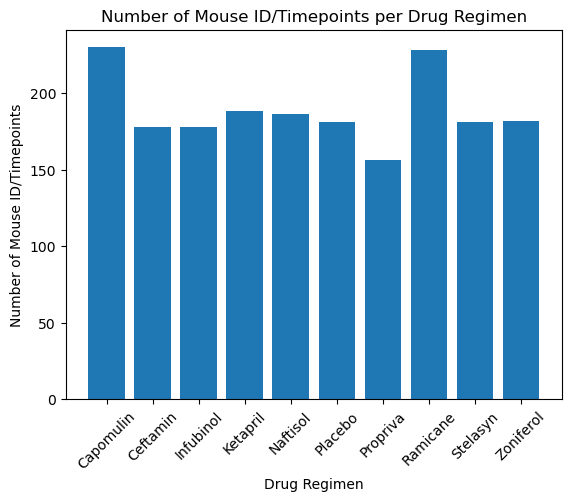

In [49]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_count = clean_mouse_df.groupby('Drug Regimen')['Mouse ID'].count()

# Extract the necessary data for plotting
regimen_names = regimen_count.index
regimen_values = regimen_count.values

# Generate a bar plot using pyplot
plt.bar(regimen_names, regimen_values)

# Set the titles and labels
plt.title('Number of Mouse ID/Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')

# Rotate the x-axis labels for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

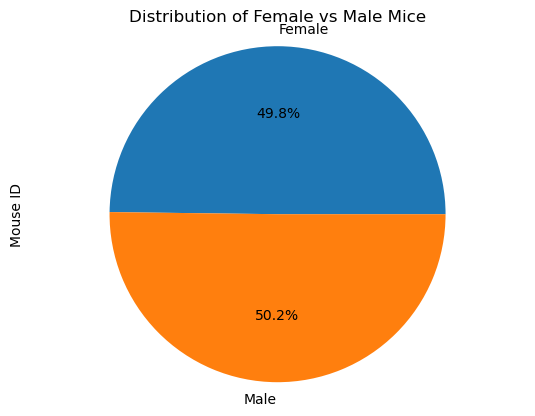

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = clean_mouse_df.groupby('Sex')['Mouse ID'].nunique()

# Generate a pie plot using Pandas
sex_count.plot(kind='pie', autopct='%1.1f%%', startangle=0, title='Distribution of Female vs Male Mice')

# Set the aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

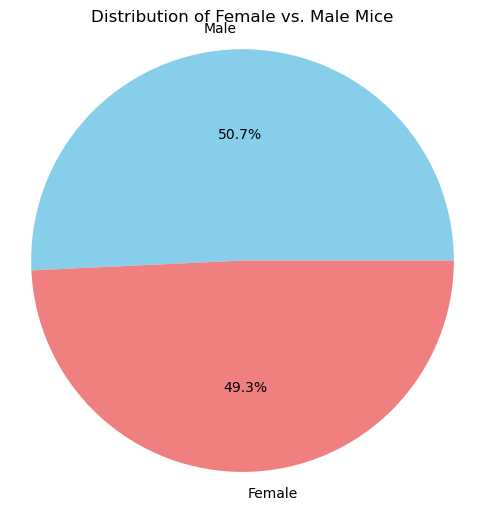

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_mouse_df["Sex"].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=0, colors=["skyblue", "lightcoral"])
plt.title("Distribution of Female vs. Male Mice")
plt.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

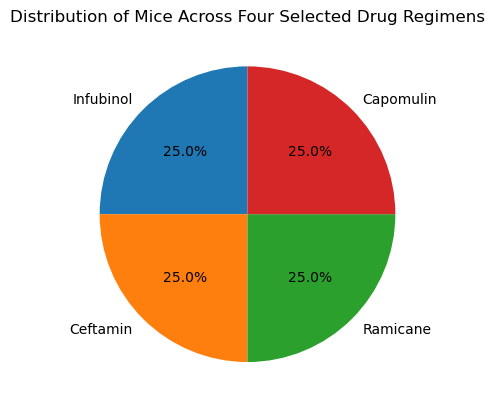

In [79]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_df = clean_mouse_df[clean_df['Drug Regimen'].isin(drug_list)]

# Group the data by Mouse ID and extract the maximum Timepoint for each group
max_time_df = pd.DataFrame(drug_df.groupby('Mouse ID')['Timepoint'].max())

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_df = pd.merge(max_time_df, drug_df, on=['Mouse ID', 'Timepoint'], how='left')

# Extract the necessary columns
final_df = final_df[['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

# Count the number of mice for each drug regimen
drug_count = final_df["Drug Regimen"].value_counts()

# Extract the necessary data for plotting
drug_labels = drug_count.index
drug_values = drug_count.values

# Generate a pie plot showing the distribution of mice for each drug regimen
plt.pie(drug_values, labels=drug_labels, autopct='%1.1f%%', startangle=90)

# Set the title of the plot
plt.title('Distribution of Mice Across Four Selected Drug Regimens')

# Show the plot
plt.show()


In [89]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_volume_data.append(tumor_volumes)

    
    # add subset 
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    print(f"{treatment} IQR: {iqr:.2f}")

    # Determine potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = tumor_volumes[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"{treatment} potential outliers: {outliers.tolist()}")
    
 

Capomulin IQR: 7.31
Capomulin potential outliers: [25.47214326, 23.34359787]
Ramicane IQR: 8.33
Ramicane potential outliers: [22.05012627]
Infubinol IQR: 10.00
Infubinol potential outliers: []
Ceftamin IQR: 9.59
Ceftamin potential outliers: []


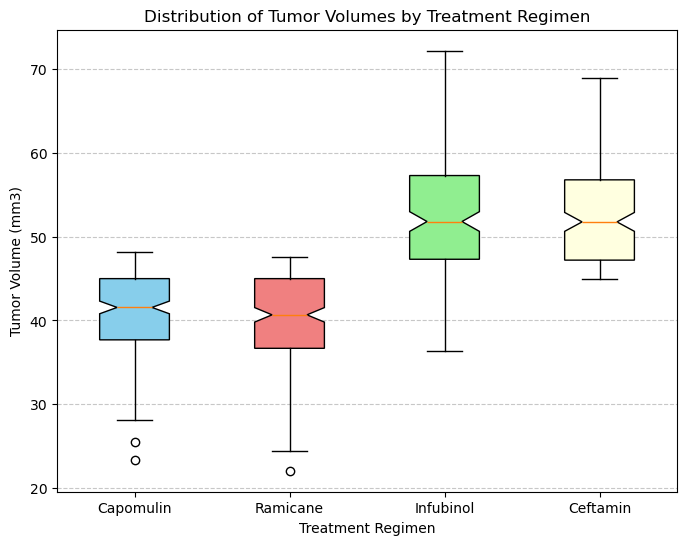

In [95]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a figure object and set the size
plt.figure(figsize=(8, 6))
plt.boxplot(tumor_volume_data, labels=treatments, patch_artist=True, notch=True)
plt.title("Distribution of Tumor Volumes by Treatment Regimen")
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Add colors to the boxes
colors = ["skyblue", "lightcoral", "lightgreen", "lightyellow"]
for patch, color in zip(plt.gca().patches, colors):
    patch.set_facecolor(color)

# Show the plot
plt.show()

## Line and Scatter Plots

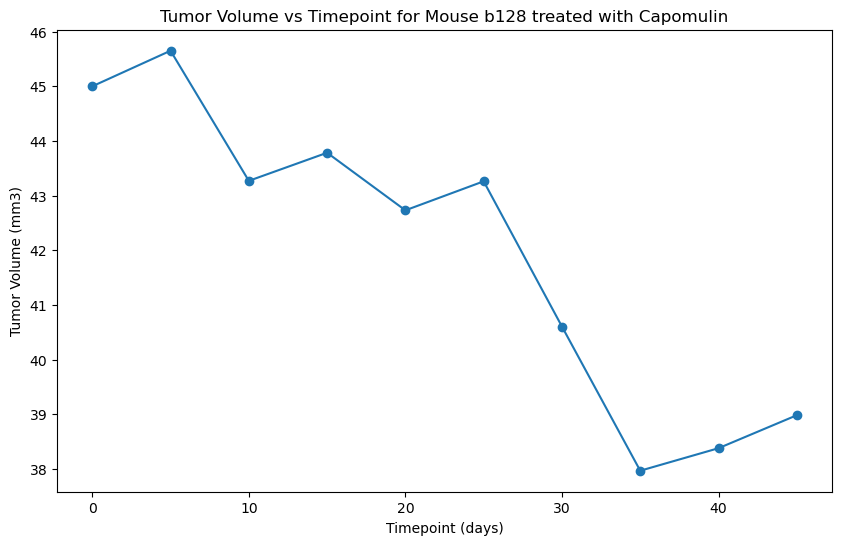

In [104]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_id = 'b128'
drug_regimen = 'Capomulin'
data = merged_df.loc[(merged_df['Drug Regimen'] == drug_regimen) & (merged_df['Mouse ID'] == mouse_id), ['Timepoint', 'Tumor Volume (mm3)']]

# Create a line plot of tumor volume vs. time point
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['Timepoint'], data['Tumor Volume (mm3)'], marker='o')
ax.set_xlabel('Timepoint (days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title(f'Tumor Volume vs Timepoint for Mouse {mouse_id} treated with {drug_regimen}')

plt.show()

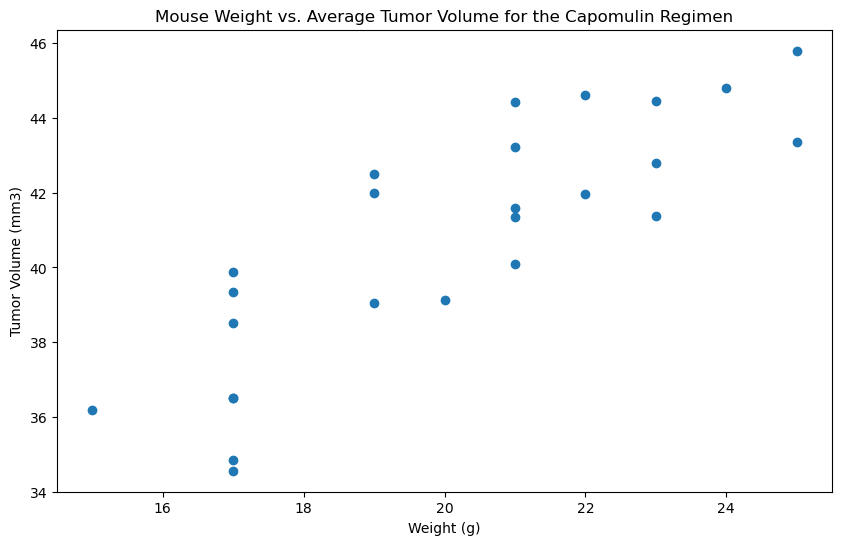

In [105]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Select the data for the Capomulin regimen
capomulin_data =merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume and mouse weight data
merged_data = pd.merge(avg_tumor_vol, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

# Create a scatter plot of mouse weight vs. average tumor volume
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen')
plt.show()


## Correlation and Regression

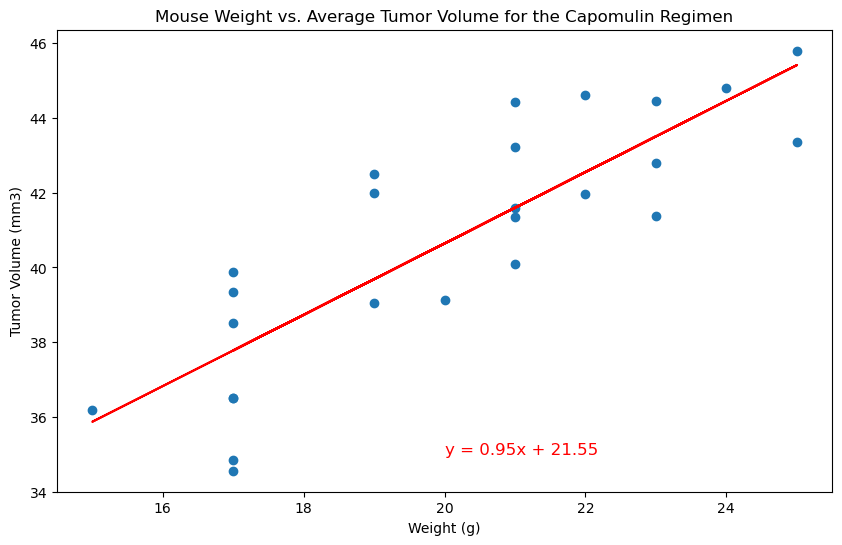

In [108]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume and mouse weight data
merged_data = pd.merge(avg_tumor_vol, capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), on='Mouse ID')

# Calculate the correlation coefficient
corr_coef = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

# Calculate the linear regression model
slope, intercept, rvalue, pvalue, stderr = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
regress_values = slope * merged_data['Weight (g)'] + intercept

# Create a scatter plot of mouse weight vs. average tumor volume with the linear regression model
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], marker='o')
ax.plot(merged_data['Weight (g)'], regress_values, color='red')
ax.annotate(f'y = {round(slope, 2)}x + {round(intercept, 2)}', (20,35), fontsize=12, color='red')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Mouse Weight vs. Average Tumor Volume for the Capomulin Regimen')
plt.show()